In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("salary.csv")
dataset.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [3]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
age                0
company_change     0
type               0
dtype: int64

In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0
age,30.0,34.266667,7.031620,21.0,29.00,34.0,37.75,56.0
company_change,30.0,0.400000,0.498273,0.0,0.00,0.0,1.00,1.0


In [5]:
dataset.corr()

,YearsExperience,Salary,age,company_change
YearsExperience,1.000000,0.978242,0.641433,-0.476989
Salary,0.978242,1.000000,0.656129,-0.552734
age,0.641433,0.656129,1.000000,-0.444854
company_change,-0.476989,-0.552734,-0.444854,1.000000


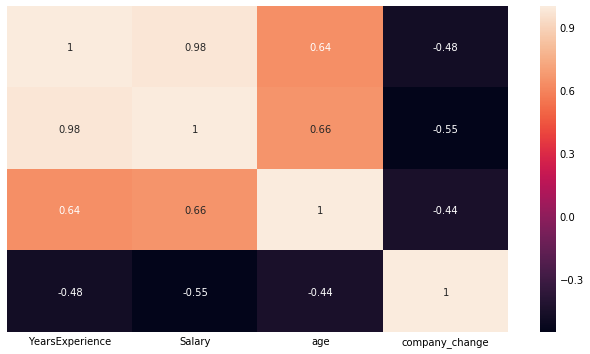

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),yticklabels=False,annot=True)

<Figure size 720x432 with 0 Axes>

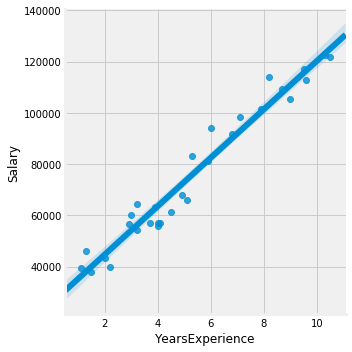

In [7]:
plt.figure(figsize=(10,6))
sns.lmplot(x="YearsExperience",y="Salary",data=dataset)

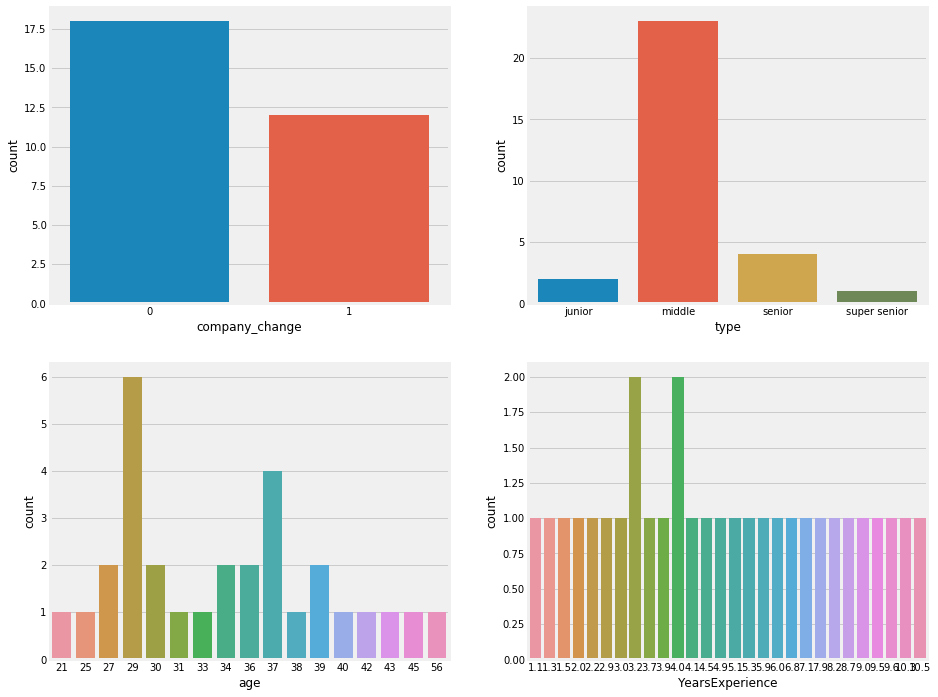

In [8]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.countplot(dataset["company_change"])
ax.add_subplot(2,2,2)
sns.countplot(dataset["type"])
ax.add_subplot(2,2,3)
sns.countplot(dataset["age"])
ax.add_subplot(2,2,4)
sns.countplot(dataset["YearsExperience"])

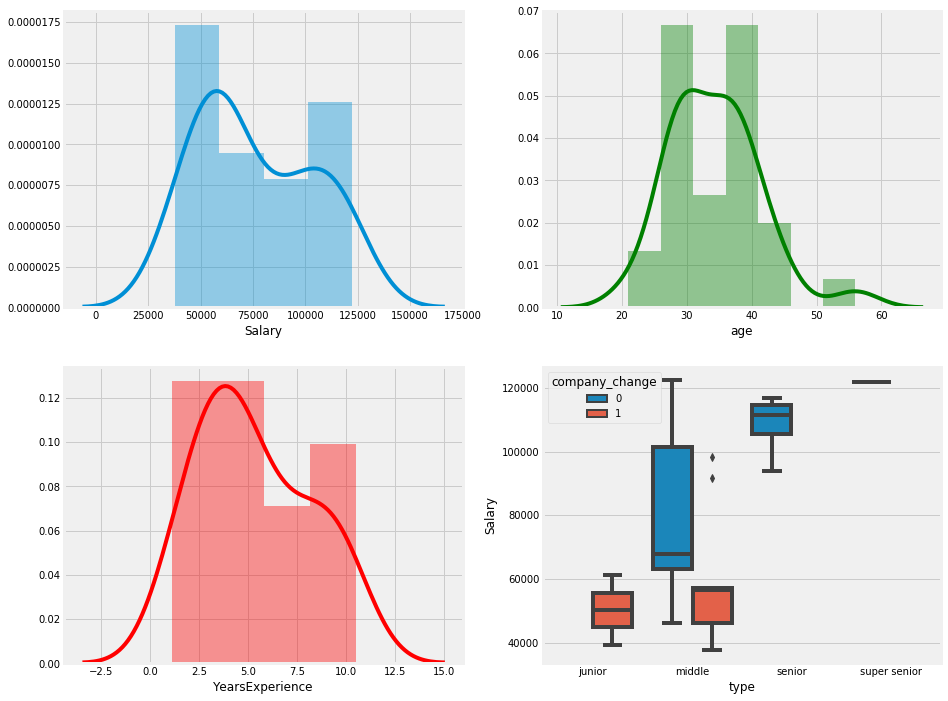

In [9]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.distplot(dataset["Salary"])
ax.add_subplot(2,2,2)
sns.distplot(dataset["age"],color="g")
ax.add_subplot(2,2,3)
sns.distplot(dataset["YearsExperience"],color="r")
ax.add_subplot(2,2,4)
sns.boxplot(x="type",y="Salary",data=dataset,hue="company_change")

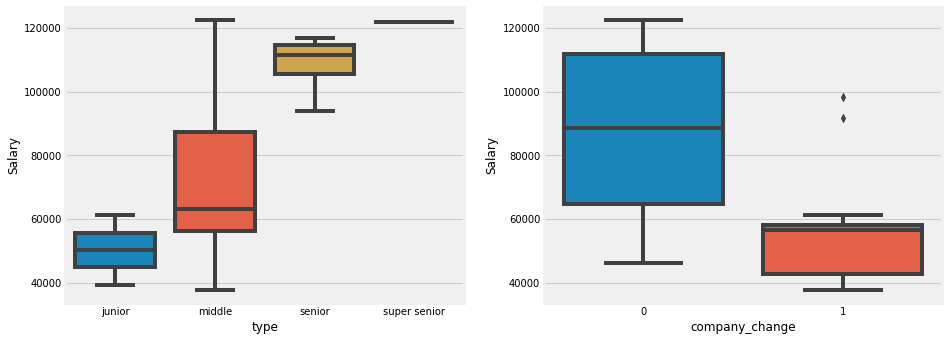

In [10]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.boxplot(x="type",y="Salary",data=dataset)
ax.add_subplot(2,2,2)
sns.boxplot(x="company_change",y="Salary",data=dataset)

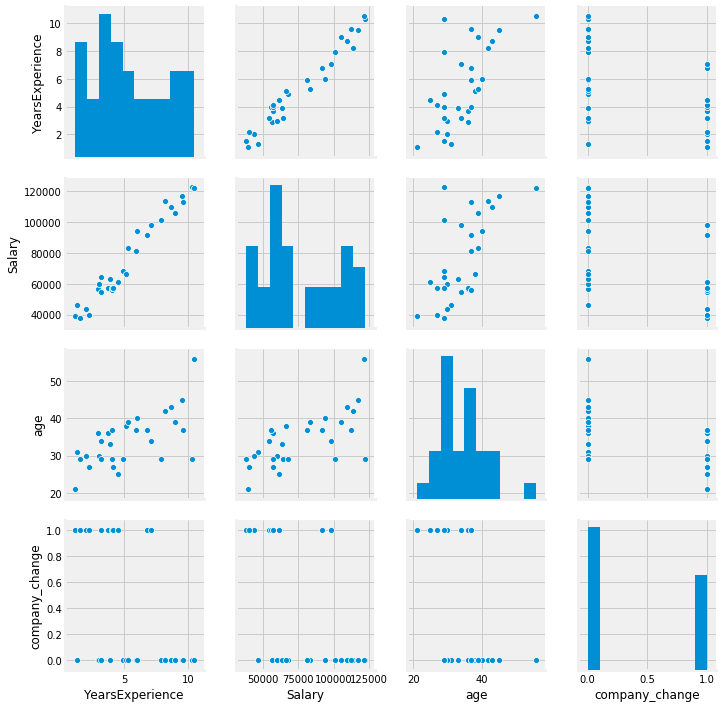

In [11]:
sns.pairplot(dataset)

In [12]:
x=np.array(dataset['YearsExperience'])
y=np.array(dataset['Salary'])
l=len(x)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)
lx=len(x_train)

# Stochastic Gradient Descent without Simulated annealing

In [15]:
m=0.1
c=0.5
alpha=0.01
for i in range(4000):
    slope=0
    intercept=0
    for j in range(l):
        random_index=np.random.randint(l)
        intercept=intercept+((m*x[random_index:random_index+1]+c)-y[random_index:random_index+1])
        slope=slope+((m*x[random_index:random_index+1]+c)-y[random_index:random_index+1])*x[random_index:random_index+1]
    c=c-((alpha*intercept)/l)
    m=m-((alpha*slope)/l)

In [16]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is [9479.13452546]
intercept is [25883.77414335]


In [17]:
y_pred=[]
for i in x_test:
    v=m*i+c
    y_pred.append(v)
print(y_pred)

[array([36310.82212135]), array([123518.85975558]), array([116883.46558776]), array([54321.17771973]), array([76123.18712829]), array([82758.58129611]), array([56217.00462482]), array([53373.26426718])]


In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score

In [19]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,3.123102e+07,5588.472237,4678.037179,0.970833


# Stochastic Gradient Descent with Simulated annealing

In [20]:
m=0.1
c=0.5
alpha=0.01
epochs=26000
decay=alpha/epochs
def learningrate(epoch):
    return alpha*(1/(1+decay*epoch)) 

In [21]:
for i in range(epochs):
    slope=0
    intercept=0
    for j in range(l):
        random_index=np.random.randint(l)
        intercept=intercept+((m*x[random_index:random_index+1]+c)-y[random_index:random_index+1])
        slope=slope+((m*x[random_index:random_index+1]+c)-y[random_index:random_index+1])*x[random_index:random_index+1]
    c=c-((alpha*intercept)/l)
    m=m-((alpha*slope)/l)
    alpha=learningrate(i)

In [22]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is [9488.95657278]
intercept is [25510.66075858]


In [23]:
y_pred=[]
for i in x_test:
    v=m*i+c
    y_pred.append(v)
print(y_pred)

[array([35948.51298864]), array([123246.91345823]), array([116604.64385728]), array([53977.53047693]), array([75802.13059432]), array([82444.40019527]), array([55875.32179148]), array([53028.63481965])]


In [24]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,3.330594e+07,5771.129856,4777.208754,0.970696


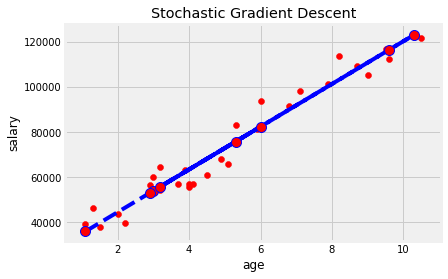

In [25]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("age")
plt.ylabel("salary")
plt.title("Stochastic Gradient Descent")
plt.show()